In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x))

# 1. Load Data

In [282]:
df_amount = pd.read_csv('aum.csv')

df_amount.head()

,customer_id,amount
0,999992,"619,716,667"
1,999994,"53,121,165"
2,1000017,0
3,1000018,"66,783"
4,1000021,"77,664,164"


In [283]:
df_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  113066 non-null  int64  
 1   amount       113066 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.7 MB


In [284]:
# Có những khách gửi tiền rất nhiều
df_amount.sort_values(by='amount', ascending=False).head()

,customer_id,amount
7471,104565,"132,500,000,000"
10804,1074871,"115,000,000,000"
48652,1356804,"104,166,666,667"
35548,123361,"81,248,531,017"
99692,38828,"79,132,290,616"


In [285]:
# Có những khách hàng không có tiền trong tài khoản
print(f'Mức tiền gửi thấp nhất {df_amount["amount"].min()}')
print(f'Mức tiền gửi cao nhất {df_amount["amount"].max()}')

Mức tiền gửi thấp nhất 0.0
Mức tiền gửi cao nhất 132500000000.0


In [286]:
df_customer = pd.read_csv('cust.csv')

df_customer.head()

,customer_id,segment,province_city
0,1016846,Regular,HA NOI
1,1016868,Regular,HO CHI MINH
2,1016903,Regular,HO CHI MINH
3,1016936,Regular,HO CHI MINH
4,1016938,Regular,HA NOI


In [287]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   customer_id    113066 non-null  int64 
 1   segment        113066 non-null  object
 2   province_city  113066 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


In [288]:
df_customer['segment'].value_counts()

segment
Regular    91166
Silver     18268
Gold        3632
Name: count, dtype: int64

In [289]:
round(df_customer['segment'].value_counts() / len(df_customer) * 100, 2)

segment
Regular   81
Silver    16
Gold       3
Name: count, dtype: float64

In [290]:
df_customer['province_city'].value_counts()

province_city
HA NOI            38153
HO CHI MINH       38048
No Info            5040
HAI PHONG          3161
THANH HOA          2051
DA NANG            1998
NAM DINH           1875
NGHE AN            1636
THUA THIEN HUE     1608
DONG NAI           1600
QUANG NINH         1474
BAC GIANG          1386
HOA BINH           1243
HAI DUONG          1123
HA TINH            1111
BINH DUONG         1090
CAN THO             949
AN GIANG            940
THAI BINH           931
VINH PHUC           874
QUANG BINH          852
LONG AN             682
PHU THO             588
NHA TRANG           536
BINH THUAN          496
VINH LONG           476
BINH DINH           467
DONG THAP           442
BAC NINH            440
THAI NGUYEN         399
VUNG TAU            290
KIEN GIANG          262
QUANG TRI           252
GIA LAI             220
QUANG NAM           206
TIEN GIANG           68
DA LAT               47
DAKLAK               39
CA MAU                8
Lang son              2
HA NAM                2
Hu

In [291]:
round(df_customer['province_city'].value_counts() / len(df_customer) * 100, 2)

province_city
HA NOI           34
HO CHI MINH      34
No Info           4
HAI PHONG         3
THANH HOA         2
DA NANG           2
NAM DINH          2
NGHE AN           1
THUA THIEN HUE    1
DONG NAI          1
QUANG NINH        1
BAC GIANG         1
HOA BINH          1
HAI DUONG         1
HA TINH           1
BINH DUONG        1
CAN THO           1
AN GIANG          1
THAI BINH         1
VINH PHUC         1
QUANG BINH        1
LONG AN           1
PHU THO           1
NHA TRANG         0
BINH THUAN        0
VINH LONG         0
BINH DINH         0
DONG THAP         0
BAC NINH          0
THAI NGUYEN       0
VUNG TAU          0
KIEN GIANG        0
QUANG TRI         0
GIA LAI           0
QUANG NAM         0
TIEN GIANG        0
DA LAT            0
DAKLAK            0
CA MAU            0
Lang son          0
HA NAM            0
Hung yen          0
Name: count, dtype: float64

Khách hàng tập trung tại 2 thành phố lớn là Hà Nội và Hồ Chí Minh

In [292]:
df_product = pd.read_csv('prod_holding.csv')

df_product.head()

,customer_id,prod_ca,prod_td,prod_credit_card,prod_app,prod_secured_loan,prod_upl
0,1016846,1,0,0,1,0,0
1,1016868,1,0,0,1,0,0
2,1016903,1,0,0,1,0,1
3,1016936,1,0,0,1,0,0
4,1016938,1,0,1,1,0,1


Các Product trong ngân hàng
- prod_ca: Tài khoản thanh toán (Current Account)
- prod_td: Tiền gửi có kỳ hạn (Time Deposit)
- prod_credit_card: Thẻ tín dụng (Credit Card)
- prod_app: App của ngân hàng
- prod_secured_loan: Vay có tài sản thế chấp (Secured Loan)
- prod_upl: Vay cá nhân không có tài sản đảm bảo (Unsecured Personal Loan)

Có 3 loại dịch vụ ở đây mang lại doanh thu cho ngân hàng là Credit Card, Secured Loan và Unsecured Personal Loan

# 2. Phân tích tổng quan tình hình sử dụng dịch vụ tại ngân hàng

In [293]:
# Đổi tên các cột thành các tên có ý nghĩa hơn
df_product.rename(
    columns={
        'prod_ca': 'Tài khoản thanh toán',
        'prod_td': 'Tiền gửi có kỳ hạn',
        'prod_credit_card': 'Thẻ tín dụng',
        'prod_app': 'Sử dụng App ngân hàng',
        'prod_secured_loan': 'Vay có tài sản thế chấp',
        'prod_upl': 'Vay tín dụng cá nhân'
    },
    inplace=True
)

df_product

,customer_id,Tài khoản thanh toán,Tiền gửi có kỳ hạn,Thẻ tín dụng,Sử dụng App ngân hàng,Vay có tài sản thế chấp,Vay tín dụng cá nhân
0,1016846,1,0,0,1,0,0
1,1016868,1,0,0,1,0,0
2,1016903,1,0,0,1,0,1
3,1016936,1,0,0,1,0,0
4,1016938,1,0,1,1,0,1
...,...,...,...,...,...,...,...
113061,126523,1,1,1,1,0,0
113062,1284395,1,0,1,1,1,0
113063,1286275,1,0,0,1,0,0
113064,1298809,1,1,0,1,0,0


In [294]:
df_product['Tài khoản thanh toán'].value_counts()

Tài khoản thanh toán
1    101458
0     11608
Name: count, dtype: int64

In [295]:
round(df_product['Tài khoản thanh toán'].value_counts() / len(df_product) * 100, 2)

Tài khoản thanh toán
1   90
0   10
Name: count, dtype: float64

In [296]:
df_product['Sử dụng App ngân hàng'].value_counts()

Sử dụng App ngân hàng
1    112862
0       204
Name: count, dtype: int64

In [297]:
round(df_product['Sử dụng App ngân hàng'].value_counts() / len(df_product) * 100, 2)

Sử dụng App ngân hàng
1   100
0     0
Name: count, dtype: float64

Bạn có thể thấy đó là 2 dịch vụ như tài khoản thanh toán và Sử dụng App ngân hàng đều có tỷ lệ người đăng ký sử dụng cao. Quan trọng nhất là 2 dịch vụ này không mang lại doanh thu cho ngân hàng. Bài toán của chúng ta đó là muốn gia tăng doanh thu của ngân hàng. Vì thế ta sẽ loại đi 2 feature này trước khi đi phân tích tiếp

In [298]:
df_product.drop(columns=['Tài khoản thanh toán', 'Sử dụng App ngân hàng'], inplace=True)

df_product.head()

,customer_id,Tiền gửi có kỳ hạn,Thẻ tín dụng,Vay có tài sản thế chấp,Vay tín dụng cá nhân
0,1016846,0,0,0,0
1,1016868,0,0,0,0
2,1016903,0,0,0,1
3,1016936,0,0,0,0
4,1016938,0,1,0,1


In [299]:
# Ta sẽ tiến hành Unpivot dữ liệu trên trước khi tiến hành vẽ biểu đồ tình hình sử dụng các dịch vụ tại ngân hàng
df_product_unpivot = pd.melt(df_product, id_vars=['customer_id'], var_name='Sản phẩm', value_name='Sử dụng dịch vụ')

df_product_unpivot

,customer_id,Sản phẩm,Sử dụng dịch vụ
0,1016846,Tiền gửi có kỳ hạn,0
1,1016868,Tiền gửi có kỳ hạn,0
2,1016903,Tiền gửi có kỳ hạn,0
3,1016936,Tiền gửi có kỳ hạn,0
4,1016938,Tiền gửi có kỳ hạn,0
...,...,...,...
452259,126523,Vay tín dụng cá nhân,0
452260,1284395,Vay tín dụng cá nhân,0
452261,1286275,Vay tín dụng cá nhân,0
452262,1298809,Vay tín dụng cá nhân,0


In [300]:
# Lọc bỏ các giá trị 0 (không sử dụng dịch vụ)
df_product_unpivot = df_product_unpivot[df_product_unpivot['Sử dụng dịch vụ'] != 0]

df_product_unpivot

,customer_id,Sản phẩm,Sử dụng dịch vụ
28,105425,Tiền gửi có kỳ hạn,1
29,105426,Tiền gửi có kỳ hạn,1
33,1557167,Tiền gửi có kỳ hạn,1
39,1032411,Tiền gửi có kỳ hạn,1
60,1032915,Tiền gửi có kỳ hạn,1
...,...,...,...
448738,1053452,Vay tín dụng cá nhân,1
449474,2238343,Vay tín dụng cá nhân,1
449559,1068493,Vay tín dụng cá nhân,1
449665,168881,Vay tín dụng cá nhân,1


In [301]:
# Vẽ biểu đồ xem mỗi sản phẩm có bao người sử dụng
df_product_groupby = df_product_unpivot.groupby(['Sản phẩm']).agg(
    total = ('Sử dụng dịch vụ', 'count')
).sort_values(by='total', ascending=False).reset_index()

df_product_groupby

,Sản phẩm,total
0,Thẻ tín dụng,23643
1,Tiền gửi có kỳ hạn,13747
2,Vay tín dụng cá nhân,684
3,Vay có tài sản thế chấp,185


In [302]:
df_product_groupby['% sử dụng'] = round(df_product_groupby['total'] / len(df_customer) * 100, 2)

df_product_groupby

,Sản phẩm,total,% sử dụng
0,Thẻ tín dụng,23643,21
1,Tiền gửi có kỳ hạn,13747,12
2,Vay tín dụng cá nhân,684,1
3,Vay có tài sản thế chấp,185,0


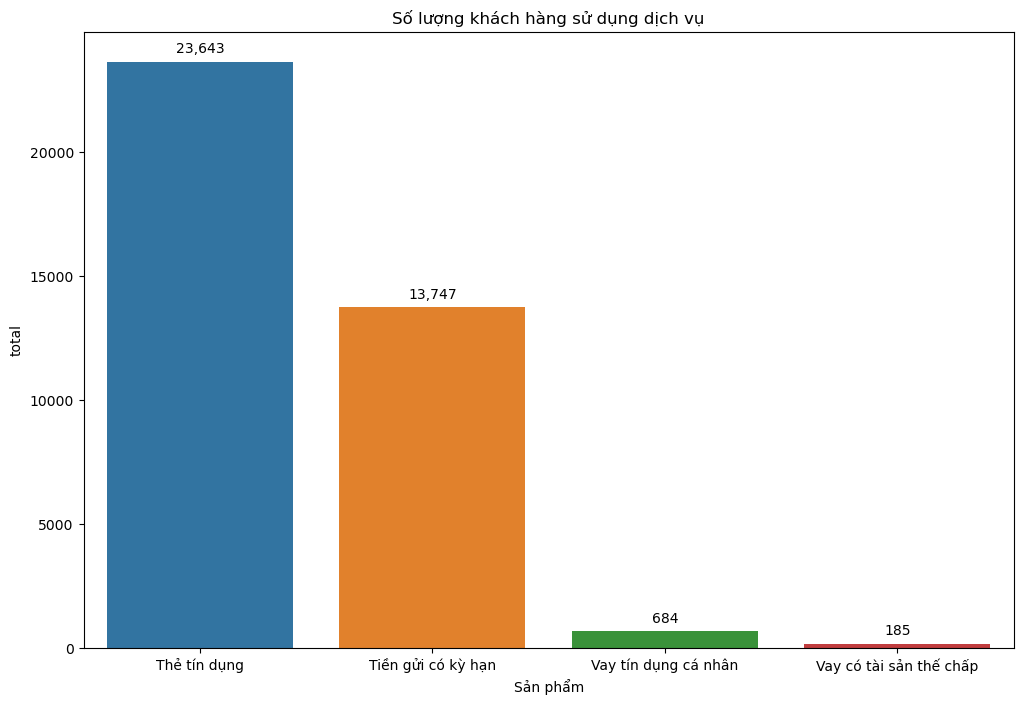

In [303]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(df_product_groupby, x='Sản phẩm', y='total')

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Số lượng khách hàng sử dụng dịch vụ')

plt.show()

Nhìn vào biểu đồ trên ta có thể thấy số lượng khách hàng sử dụng thẻ tín dụng của ngân hàng là chưa cao (chỉ có 21 % khách hàng là có thẻ tín dụng), số lượng khách hàng sử dụng dịch vụ vay có thế chấp và vay tín chấp tổng lại chưa tới 2% số lượng khách hàng.

=> <b>Vì vậy để cải thiện doanh thu ta cần phải tăng số lượng thẻ tín dụng và các khoản vay cho khách hàng</b>

## 2.1. Kiểm tra tình hình phát hành thẻ tín dụng tại ngân hàng

Giờ ta sẽ lọc ra các khách hàng không có thẻ tín dụng và xem xem họ thuộc Segment nào

In [304]:
df_customer

,customer_id,segment,province_city
0,1016846,Regular,HA NOI
1,1016868,Regular,HO CHI MINH
2,1016903,Regular,HO CHI MINH
3,1016936,Regular,HO CHI MINH
4,1016938,Regular,HA NOI
...,...,...,...
113061,126523,Gold,HO CHI MINH
113062,1284395,Gold,VUNG TAU
113063,1286275,Gold,NHA TRANG
113064,1298809,Gold,HO CHI MINH


In [305]:
df_product_unpivot

,customer_id,Sản phẩm,Sử dụng dịch vụ
28,105425,Tiền gửi có kỳ hạn,1
29,105426,Tiền gửi có kỳ hạn,1
33,1557167,Tiền gửi có kỳ hạn,1
39,1032411,Tiền gửi có kỳ hạn,1
60,1032915,Tiền gửi có kỳ hạn,1
...,...,...,...
448738,1053452,Vay tín dụng cá nhân,1
449474,2238343,Vay tín dụng cá nhân,1
449559,1068493,Vay tín dụng cá nhân,1
449665,168881,Vay tín dụng cá nhân,1


In [306]:
len(df_customer)

113066

In [307]:
df_product_customer = df_customer.merge(df_product_unpivot, on='customer_id', how='left')

df_product_customer

,customer_id,segment,province_city,Sản phẩm,Sử dụng dịch vụ
0,1016846,Regular,HA NOI,NaN,NaN
1,1016868,Regular,HO CHI MINH,NaN,NaN
2,1016903,Regular,HO CHI MINH,Vay tín dụng cá nhân,1
3,1016936,Regular,HO CHI MINH,NaN,NaN
4,1016938,Regular,HA NOI,Thẻ tín dụng,1
...,...,...,...,...,...
116549,1284395,Gold,VUNG TAU,Vay có tài sản thế chấp,1
116550,1286275,Gold,NHA TRANG,NaN,NaN
116551,1298809,Gold,HO CHI MINH,Tiền gửi có kỳ hạn,1
116552,1298427,Gold,NAM DINH,Tiền gửi có kỳ hạn,1


In [308]:
# Ta cần lấy ra các khách hàng chưa có thẻ tín dụng
all_customers_has_credit_card = df_product_unpivot[df_product_unpivot['Sản phẩm'] == 'Thẻ tín dụng']['customer_id'].to_list()

all_customers_has_credit_card

[1016938,
 1012507,
 1021136,
 1003073,
 1003126,
 100306,
 1021602,
 1010062,
 1016837,
 1005639,
 1017010,
 1007805,
 1007836,
 1007876,
 1019062,
 1039052,
 1603125,
 1557950,
 1558115,
 1558194,
 1012757,
 1031612,
 1005409,
 1031861,
 1003354,
 1016423,
 1008320,
 1036280,
 2115933,
 2126142,
 2126214,
 2126237,
 1065492,
 1557334,
 1030572,
 1664936,
 2161038,
 2161710,
 1012299,
 1012314,
 1010544,
 1010576,
 1008321,
 1008188,
 1052141,
 1622042,
 1624205,
 2165753,
 2846010,
 2846021,
 2106724,
 2158744,
 2838767,
 2838812,
 2165261,
 2845606,
 2839073,
 2165393,
 2233800,
 2233918,
 2233730,
 2233684,
 2233940,
 1019560,
 1036082,
 104099,
 1041132,
 1571734,
 1578065,
 1578095,
 1578203,
 1552862,
 1552870,
 155281,
 1602987,
 1603000,
 1041544,
 1571451,
 1067093,
 1004255,
 1004282,
 1004414,
 1036135,
 1014552,
 1016659,
 1577840,
 1005217,
 1067324,
 1005316,
 1072851,
 1072939,
 1025629,
 1025661,
 102594,
 1006913,
 1011759,
 1011796,
 1052218,
 1071434,
 1011837,
 101

In [309]:
# Lọc danh sách các khách hàng chưa có thẻ tín dụng để phân tích
df_customer_dont_have_credit_card = df_product_customer[~df_product_customer['customer_id'].isin(all_customers_has_credit_card)]

df_customer_dont_have_credit_card

,customer_id,segment,province_city,Sản phẩm,Sử dụng dịch vụ
0,1016846,Regular,HA NOI,NaN,NaN
1,1016868,Regular,HO CHI MINH,NaN,NaN
2,1016903,Regular,HO CHI MINH,Vay tín dụng cá nhân,1
3,1016936,Regular,HO CHI MINH,NaN,NaN
6,1007581,Regular,HA NOI,NaN,NaN
...,...,...,...,...,...
116541,132101,Gold,HO CHI MINH,Tiền gửi có kỳ hạn,1
116550,1286275,Gold,NHA TRANG,NaN,NaN
116551,1298809,Gold,HO CHI MINH,Tiền gửi có kỳ hạn,1
116552,1298427,Gold,NAM DINH,Tiền gửi có kỳ hạn,1


Ta sẽ xác định xem có bao nhiêu khách hàng theo từng segment chưa có thẻ tín dụng

In [310]:
df_customer_segment_dont_have_creditcard = df_customer_dont_have_credit_card.groupby(['segment']).agg(
    total_customers = ('customer_id', 'nunique')
).sort_values(by='total_customers', ascending=False).reset_index()

df_customer_segment_dont_have_creditcard

,segment,total_customers
0,Regular,77921
1,Silver,8587
2,Gold,1919


In [311]:
df_customer_segment = df_customer.groupby(['segment']).agg(
    total_customers = ('customer_id', 'count')
).reset_index()

df_customer_segment

,segment,total_customers
0,Gold,3632
1,Regular,91166
2,Silver,18268


In [312]:
df_customer_segment_dont_have_creditcard = df_customer_segment_dont_have_creditcard.merge(df_customer_segment, on='segment', how='left', suffixes=('_dont_have_credit_cards', ''))

df_customer_segment_dont_have_creditcard

,segment,total_customers_dont_have_credit_cards,total_customers
0,Regular,77921,91166
1,Silver,8587,18268
2,Gold,1919,3632


In [313]:
df_customer_segment_dont_have_creditcard['% customers'] = \
    round(df_customer_segment_dont_have_creditcard['total_customers_dont_have_credit_cards'] / df_customer_segment_dont_have_creditcard['total_customers'] * 100, 2)

df_customer_segment_dont_have_creditcard

,segment,total_customers_dont_have_credit_cards,total_customers,% customers
0,Regular,77921,91166,85
1,Silver,8587,18268,47
2,Gold,1919,3632,53


Ta có thể thấy lượng khách hàng Silver và Gold chưa có thẻ tín dụng là rất nhiều. Để gia tăng doanh thu cho ngân hàng thì bạn có thể mở chiến dịch mở thẻ ngân hàng cho các nhóm khách hàng Silver và Gold. Từ đó gia tăng lượng khách hàng sử dụng thẻ tín dụng của doanh nghiệp

Ngoài ra bạn có thể thấy số lượng khách hàng Regular chưa có thẻ tín dụng rất nhiều. Ta nên xem xét xem các khách hàng Regular nếu có lượng tiền gửi ở ngân hàng lớn thì ta có thể nâng hạng cho họ lên Silver (Nếu có lượng tiền gửi trên 50 triệu thì có thể xem xét nâng hạng cho họ) => Sau khi nâng hạng thì hãy khuyến khích họ mở thẻ tín dụng => Qua đó gia tăng số lượng khách hàng sử dụng thẻ tín dụng tại ngân hàng

Giờ ta sẽ kiểm tra xem lượng tiền mặt đang có tại ngân hàng của các khách hàng Regular và không có thẻ tín dụng

In [314]:
df_customer_regular_dont_have_credit_cards = df_customer[(df_customer['segment'] == 'Regular') & (~df_customer['customer_id'].isin(all_customers_has_credit_card))]

df_customer_regular_dont_have_credit_cards = df_customer_regular_dont_have_credit_cards['customer_id'].unique().tolist()

df_customer_regular_dont_have_credit_cards

[1016846,
 1016868,
 1016903,
 1016936,
 1007581,
 1007593,
 1012496,
 1007325,
 10064,
 100731,
 1016639,
 1016667,
 1062033,
 1062045,
 1068920,
 1074481,
 1074524,
 1074658,
 1074717,
 1054249,
 1054250,
 1054252,
 1054276,
 1054289,
 1054293,
 1054313,
 105425,
 105426,
 1054366,
 1054391,
 1557160,
 1557167,
 1557172,
 1081819,
 1081826,
 1081613,
 1081625,
 1032411,
 1032454,
 1032460,
 1032470,
 1017871,
 1017888,
 1017976,
 103258,
 1032685,
 1032693,
 1021112,
 1021188,
 1021210,
 1021216,
 1021308,
 1032700,
 1032731,
 1032737,
 1032812,
 1032872,
 1032915,
 1032968,
 1003051,
 1003081,
 1003113,
 1006611,
 1006700,
 1033030,
 1010043,
 1010076,
 1014802,
 1016346,
 1016366,
 101653,
 102150,
 1021599,
 1021640,
 1003247,
 1571258,
 1571283,
 1571304,
 15719,
 1572922,
 1011659,
 1011700,
 1011717,
 1001478,
 1001481,
 1001504,
 100142,
 1012613,
 1005608,
 101682,
 1016954,
 1025784,
 10199,
 1007707,
 1007745,
 1007752,
 1007773,
 1007861,
 1031594,
 1603048,
 1019052,
 101

In [315]:
df_amount[(df_amount['customer_id'].isin(df_customer_regular_dont_have_credit_cards)) & (df_amount['amount'] >= 50000000)].sort_values(by='amount', ascending=False)

,customer_id,amount
44629,131403,"1,753,961,359"
82780,247254,"1,666,666,667"
91866,284550,"1,500,000,002"
57037,1553077,"1,250,994,228"
34646,122886,"1,185,841,072"
...,...,...
46189,1329546,"50,000,000"
44361,1310671,"50,000,000"
81174,2442889,"50,000,000"
69758,2255465,"50,000,000"


Ta có thể thấy có tới 2867 khách hàng có số tiền gửi tại ngân hàng trên 50 triệu đồng và chưa có thẻ tín dụng. Thậm chí có những khách hàng có tiền tỷ trong ngân hàng nhưng vẫn xếp khách hàng này là khách hàng Regular. Đây là 1 điều rất vô lý vì đây hoàn toàn là các khách hàng rất tiềm năng của ngân hàng.

Kiến nghị ngân hàng sẽ nâng hạng lên Silver và Gold cho nhóm khách hàng này, qua đó khuyến khích họ phát hành thẻ tín dụng.

## 2.2. Xem xét nâng cao tỷ lệ khách hàng cho vay có tài sản thế chấp

Nhóm khách hàng thường vay tiền theo hình thức có tài sản thế chấp đó là nhóm khách hàng có tài khoản tiền gửi lớn hoặc có tài sản đảm bảo bên ngoài (dữ liệu không cung cấp nên chưa biết được)

In [316]:
# Lấy ra danh sách khách hàng cho vay có tài sản thế chấp trước
customers_secure_loan = df_product_unpivot[df_product_unpivot['Sản phẩm'] == 'Vay có tài sản thế chấp']['customer_id'].to_list()

customers_secure_loan

[1021136,
 1021602,
 2161710,
 1052141,
 2839073,
 2233800,
 2233918,
 2233730,
 1072851,
 1005904,
 1006349,
 1022153,
 1035982,
 1047176,
 1064599,
 1028034,
 2183587,
 2183590,
 1011854,
 1013314,
 101759,
 2121844,
 2146724,
 2177435,
 1015480,
 3775749,
 3790153,
 3790166,
 1068907,
 1068935,
 1074543,
 1000596,
 2168112,
 1041359,
 1053144,
 1024647,
 2153472,
 2153573,
 1009304,
 1580415,
 2824423,
 1081660,
 1010186,
 1009068,
 1020933,
 1009170,
 1026217,
 1012139,
 1013300,
 1016876,
 2219425,
 220583,
 2229685,
 1005237,
 1012858,
 2120873,
 2215147,
 1663594,
 1020562,
 1013347,
 1834639,
 1834778,
 2140768,
 1036217,
 1029651,
 1029744,
 1040436,
 2188755,
 3788196,
 1637574,
 1042722,
 1050299,
 2128458,
 2128610,
 1000151,
 1021641,
 1053596,
 1053730,
 1039210,
 2845840,
 1018906,
 1003992,
 1012098,
 1032996,
 2139578,
 2132409,
 1009217,
 1006553,
 1624264,
 1004958,
 1019632,
 1017073,
 1048468,
 2271436,
 2204443,
 2279252,
 367788,
 3780916,
 3761613,
 3832008,
 10

In [317]:
# Lấy ra danh sách các khách hàng chưa có khoản vay có thế chấp và lấy ra số tiền gửi trong ngân hàng
df_customer_dont_have_secure_loan = df_amount[~df_amount['customer_id'].isin(customers_secure_loan)]

df_customer_dont_have_secure_loan = df_customer_dont_have_secure_loan.sort_values(by='amount', ascending=False)

df_customer_dont_have_secure_loan

,customer_id,amount
7471,104565,"132,500,000,000"
10804,1074871,"115,000,000,000"
48652,1356804,"104,166,666,667"
35548,123361,"81,248,531,017"
99692,38828,"79,132,290,616"
...,...,...
49748,1369073,0
49738,1368739,0
49732,1368623,0
100076,3891615,0


In [318]:
df_customer_dont_have_secure_loan = df_customer_dont_have_secure_loan[df_customer_dont_have_secure_loan['amount'] >= 50000000]

df_customer_dont_have_secure_loan

,customer_id,amount
7471,104565,"132,500,000,000"
10804,1074871,"115,000,000,000"
48652,1356804,"104,166,666,667"
35548,123361,"81,248,531,017"
99692,38828,"79,132,290,616"
...,...,...
87715,2555051,"50,000,000"
99765,3886721,"50,000,000"
44139,1308239,"50,000,000"
5726,1028870,"50,000,000"


Chúng ta có gần 10k khách hàng có số dư tài khoản lên tới trên 50 triệu đồng. Đây là nhóm khách hàng có thể tiến hành gợi ý họ các gói vay có tài sản thế chấp như mua xe máy, mua điện thoại, mua ô tô, xây nhà, ... hoàn toàn hợp lý => Đây là các khách hàng mà doanh nghiệp nên thử tập trung để tăng doanh thu trong thời gian tới

In [319]:
# Ta sẽ lấy thêm thông tin xem các khách hàng này ở tỉnh thành nào
df_customer_dont_have_secure_loan = df_customer_dont_have_secure_loan.merge(df_customer, on='customer_id', how='inner')

df_customer_dont_have_secure_loan

,customer_id,amount,segment,province_city
0,104565,"132,500,000,000",Gold,HO CHI MINH
1,1074871,"115,000,000,000",Gold,HA NOI
2,1356804,"104,166,666,667",Gold,HO CHI MINH
3,123361,"81,248,531,017",Gold,HO CHI MINH
4,38828,"79,132,290,616",Gold,HA NOI
...,...,...,...,...
9819,2555051,"50,000,000",Regular,HO CHI MINH
9820,3886721,"50,000,000",Regular,NAM DINH
9821,1308239,"50,000,000",Regular,DONG THAP
9822,1028870,"50,000,000",Regular,HO CHI MINH


In [320]:
# Xem phân bố các khách hàng tiềm năng theo tỉnh thành
df_customer_dont_have_secure_loan_city = df_customer_dont_have_secure_loan.groupby(['province_city']).agg(
    total_customers = ('segment', 'count'),
    total_amount = ('amount', 'sum')
).sort_values(by='total_customers', ascending=False).reset_index()

df_customer_dont_have_secure_loan_city

,province_city,total_customers,total_amount
0,HO CHI MINH,5331,"4,353,079,795,512"
1,HA NOI,1347,"1,166,663,527,274"
2,HAI PHONG,363,"168,296,982,602"
3,NAM DINH,349,"270,086,862,352"
4,THUA THIEN HUE,282,"90,385,594,872"
5,NGHE AN,213,"82,126,080,333"
6,THANH HOA,188,"96,885,106,392"
7,BAC GIANG,182,"104,463,216,842"
8,DA NANG,150,"87,927,318,915"
9,HOA BINH,139,"66,227,669,199"


In [321]:
df_customer_dont_have_secure_loan_city['% customers'] = \
    round(df_customer_dont_have_secure_loan_city['total_customers'] / sum(df_customer_dont_have_secure_loan_city['total_customers']) * 100, 2)

df_customer_dont_have_secure_loan_city['% amount'] = \
    round(df_customer_dont_have_secure_loan_city['total_amount'] / sum(df_customer_dont_have_secure_loan_city['total_amount']) * 100, 2)

df_customer_dont_have_secure_loan_city['amount / customer'] = df_customer_dont_have_secure_loan_city['total_amount'] / df_customer_dont_have_secure_loan_city['total_customers']

df_customer_dont_have_secure_loan_city

,province_city,total_customers,total_amount,% customers,% amount,amount / customer
0,HO CHI MINH,5331,"4,353,079,795,512",54,61,"816,559,707"
1,HA NOI,1347,"1,166,663,527,274",14,16,"866,119,916"
2,HAI PHONG,363,"168,296,982,602",4,2,"463,628,051"
3,NAM DINH,349,"270,086,862,352",4,4,"773,887,858"
4,THUA THIEN HUE,282,"90,385,594,872",3,1,"320,516,294"
5,NGHE AN,213,"82,126,080,333",2,1,"385,568,452"
6,THANH HOA,188,"96,885,106,392",2,1,"515,346,311"
7,BAC GIANG,182,"104,463,216,842",2,1,"573,973,719"
8,DA NANG,150,"87,927,318,915",2,1,"586,182,126"
9,HOA BINH,139,"66,227,669,199",1,1,"476,458,052"


Nhìn vào kết quả tính toán ở trên ta có thể thấy lượng tiền gửi tính trên đầu người của Hồ Chí Minh và Hà Nội khá tương đồng với nhau. Tuy nhiên nếu nhìn kỹ vào các tỉnh thành khác thì bạn sẽ thấy có rất nhiều các tỉnh thành khác có lượng tiền gửi tính trên đầu người khá cao. Đây là các tỉnh thành chứa các khách hàng tiềm năng mà ngân hàng có thể tập trung khai thác

In [322]:
df_customer_dont_have_secure_loan_city.sort_values(by='amount / customer', ascending=False)

,province_city,total_customers,total_amount,% customers,% amount,amount / customer
20,BAC NINH,45,"71,163,095,666",0,1,"1,581,402,126"
28,VUNG TAU,21,"21,254,849,030",0,0,"1,012,135,668"
34,GIA LAI,7,"7,044,867,050",0,0,"1,006,409,579"
17,QUANG BINH,73,"67,368,139,037",1,1,"922,851,220"
1,HA NOI,1347,"1,166,663,527,274",14,16,"866,119,916"
18,THAI NGUYEN,56,"47,459,620,105",1,1,"847,493,216"
0,HO CHI MINH,5331,"4,353,079,795,512",54,61,"816,559,707"
25,BINH THUAN,30,"24,363,623,039",0,0,"812,120,768"
3,NAM DINH,349,"270,086,862,352",4,4,"773,887,858"
26,LONG AN,29,"21,713,230,624",0,0,"748,732,090"


In [343]:
df_customer_dont_have_secure_loan_city.sort_values(by='amount / customer', ascending=False)['province_city'].head(10).tolist()

['BAC NINH',
 'VUNG TAU',
 'GIA LAI',
 'QUANG BINH',
 'HA NOI',
 'THAI NGUYEN',
 'HO CHI MINH',
 'BINH THUAN',
 'NAM DINH',
 'LONG AN']

Điều bất ngờ khi tính toán đó là ta có top 10 các tỉnh thành có số lượng tiền gửi tính trên đầu người cao nhất là Bắc Ninh, Vũng Tàu, Gia Lai, Quảng Bình, Hà Nội, Thái Nguyên, Hồ Chí Minh, Bình Thuận, Nam Định, Long An.

Ngoài ra theo số liệu thu thập về các tỉnh thành có GDP cao nhất Việt Nam hiện tại. Ta sẽ lấy ra top 20 tỉnh thành.

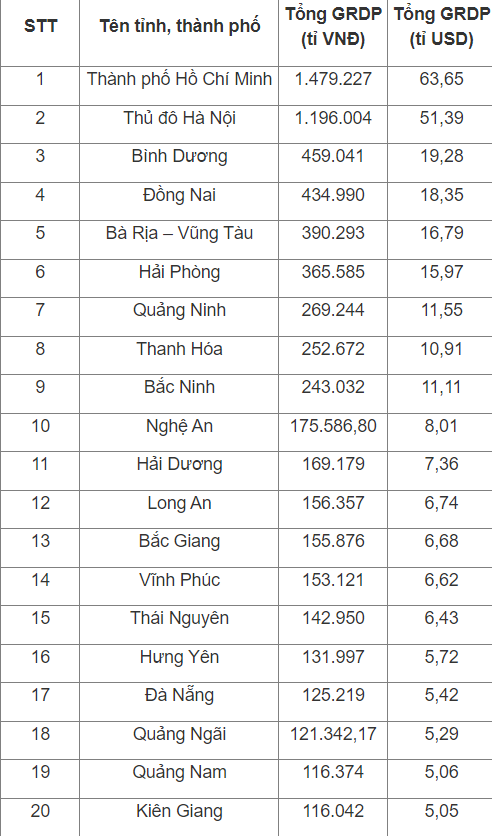

Dựa vào danh sách trên ta sẽ loại bỏ các tỉnh thành không có GDP nằm trong top 20

Vì thế các tỉnh thành mà ngân hàng nên tập trung khai thác các khách hàng sẽ là:
- Bắc Ninh
- Vũng Tàu
- Hà Nội
- Thái Nguyên
- Hồ Chí Minh
- Long An

In [323]:
mien_bac = ["Cao Bang", "Lang Son", "Bac Kan", "Thai Nguyen", "Lao Cai", "Yen Bai", "Tuyên Quang", "Ha Giang", "Phu Tho", "Bac Giang", "Quang Ninh", "Lai Chau", "Đien Bien", "Lao Cai", "Son La", "Hoa Binh", "Ha Noi", "Hai Phong", "Hai Duong", "Hung Yen", "Nam Dinh", "Thai Binh", "Ninh Binh", "Vinh Phuc", "Bac Ninh", "Ha Nam", "Ha Tay", "Hoa Binh", "Hai Duong"]
mien_trung = ["Thanh Hoa", "Nghe An", "Ha Tinh", "Quang Binh", "Quang Tri", "Thua Thien Hue", "Da Nang", "Quang Nam", "Quang Ngai", "Binh Dinh", "Phu Yen", "Khanh Hoa", 'Nha Trang', "Ninh Thuan", "Binh Thuan", "Kon Tum", "Gia Lai", "Dak Lak", "Dak Nong", "Lam Dong", "Da Lat"]
mien_nam = ["Vung Tau", "Binh Phuoc", "Tay Ninh", "Binh Duong", "Dong Nai", "Ba Ria Vung Tau", "Ho Chi Minh", "Long An", "Dong Thap", "Tien Giang", "An Giang", "Kien Giang", "Can Tho", "Hau Giang", "Soc Trang", "Ben Tre", "Tra Vinh", "Vinh Long", "Ca Mau", "Bac Lieu", "Can Tho"]

mien_bac = [tinh.upper() for tinh in mien_bac]
mien_trung = [tinh.upper() for tinh in mien_trung]
mien_nam = [tinh.upper() for tinh in mien_nam]

In [324]:
def get_domain(x):
    if x in mien_bac:
        return 'Miền Bắc'
    elif x in mien_trung:
        return 'Miền Trung'
    elif x in mien_nam:
        return 'Miền Nam'
    else:
        return 'Không có thông tin'

In [325]:
df_customer_dont_have_secure_loan_city['Miền'] = df_customer_dont_have_secure_loan_city['province_city'].apply(lambda x: get_domain(x))

df_customer_dont_have_secure_loan_city

,province_city,total_customers,total_amount,% customers,% amount,amount / customer,Miền
0,HO CHI MINH,5331,"4,353,079,795,512",54,61,"816,559,707",Miền Nam
1,HA NOI,1347,"1,166,663,527,274",14,16,"866,119,916",Miền Bắc
2,HAI PHONG,363,"168,296,982,602",4,2,"463,628,051",Miền Bắc
3,NAM DINH,349,"270,086,862,352",4,4,"773,887,858",Miền Bắc
4,THUA THIEN HUE,282,"90,385,594,872",3,1,"320,516,294",Miền Trung
5,NGHE AN,213,"82,126,080,333",2,1,"385,568,452",Miền Trung
6,THANH HOA,188,"96,885,106,392",2,1,"515,346,311",Miền Trung
7,BAC GIANG,182,"104,463,216,842",2,1,"573,973,719",Miền Bắc
8,DA NANG,150,"87,927,318,915",2,1,"586,182,126",Miền Trung
9,HOA BINH,139,"66,227,669,199",1,1,"476,458,052",Miền Bắc


In [326]:
df_domain_customer = df_customer_dont_have_secure_loan_city.groupby(['Miền']).agg(
    total_customers = ('total_customers', 'sum')
).sort_values(by='total_customers', ascending=False).reset_index()

df_domain_customer

,Miền,total_customers
0,Miền Nam,5524
1,Miền Bắc,2973
2,Miền Trung,1191
3,Không có thông tin,136


In [327]:
df_domain_customer['% total customers'] = round(df_domain_customer['total_customers'] / sum(df_domain_customer['total_customers']) * 100, 2)

df_domain_customer

,Miền,total_customers,% total customers
0,Miền Nam,5524,56
1,Miền Bắc,2973,30
2,Miền Trung,1191,12
3,Không có thông tin,136,1


In [328]:
df_amount

,customer_id,amount
0,999992,"619,716,667"
1,999994,"53,121,165"
2,1000017,0
3,1000018,"66,783"
4,1000021,"77,664,164"
...,...,...
113061,4693215,"41,849"
113062,4693217,525
113063,4693229,59
113064,4701973,0


In [329]:
df_customer

,customer_id,segment,province_city
0,1016846,Regular,HA NOI
1,1016868,Regular,HO CHI MINH
2,1016903,Regular,HO CHI MINH
3,1016936,Regular,HO CHI MINH
4,1016938,Regular,HA NOI
...,...,...,...
113061,126523,Gold,HO CHI MINH
113062,1284395,Gold,VUNG TAU
113063,1286275,Gold,NHA TRANG
113064,1298809,Gold,HO CHI MINH


In [330]:
df_customer['Miền'] = df_customer['province_city'].apply(lambda x: get_domain(x))

df_customer.head()

,customer_id,segment,province_city,Miền
0,1016846,Regular,HA NOI,Miền Bắc
1,1016868,Regular,HO CHI MINH,Miền Nam
2,1016903,Regular,HO CHI MINH,Miền Nam
3,1016936,Regular,HO CHI MINH,Miền Nam
4,1016938,Regular,HA NOI,Miền Bắc


In [331]:
df_customer = df_customer.merge(df_amount, on='customer_id', how='left')

df_customer.head()

,customer_id,segment,province_city,Miền,amount
0,1016846,Regular,HA NOI,Miền Bắc,"36,363"
1,1016868,Regular,HO CHI MINH,Miền Nam,"55,172"
2,1016903,Regular,HO CHI MINH,Miền Nam,"241,653"
3,1016936,Regular,HO CHI MINH,Miền Nam,"64,215"
4,1016938,Regular,HA NOI,Miền Bắc,"45,915"


In [332]:
df_customer.groupby(['Miền']).agg(
    total_amount = ('amount', 'sum')
).reset_index()

,Miền,total_amount
0,Không có thông tin,"38,469,568,290"
1,Miền Bắc,"2,230,906,925,476"
2,Miền Nam,"4,578,001,074,141"
3,Miền Trung,"556,323,727,582"


In [333]:
df_domain_customer = df_domain_customer.merge(
    df_customer.groupby(['Miền']).agg(
        total_amount = ('amount', 'sum')
    ).reset_index(),
    on='Miền',
    how='left'
)

df_domain_customer

,Miền,total_customers,% total customers,total_amount
0,Miền Nam,5524,56,"4,578,001,074,141"
1,Miền Bắc,2973,30,"2,230,906,925,476"
2,Miền Trung,1191,12,"556,323,727,582"
3,Không có thông tin,136,1,"38,469,568,290"


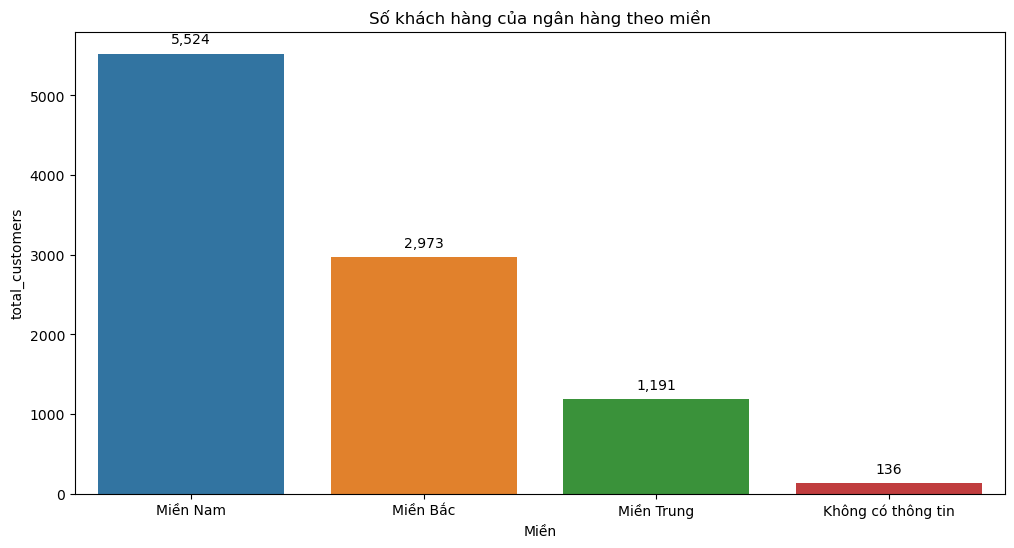

In [334]:
plt.figure(figsize=(12,6))

ax = sns.barplot(df_domain_customer, x='Miền', y='total_customers')

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Số khách hàng của ngân hàng theo miền')

plt.show()

In [335]:
df_domain_customer.head()

,Miền,total_customers,% total customers,total_amount
0,Miền Nam,5524,56,"4,578,001,074,141"
1,Miền Bắc,2973,30,"2,230,906,925,476"
2,Miền Trung,1191,12,"556,323,727,582"
3,Không có thông tin,136,1,"38,469,568,290"


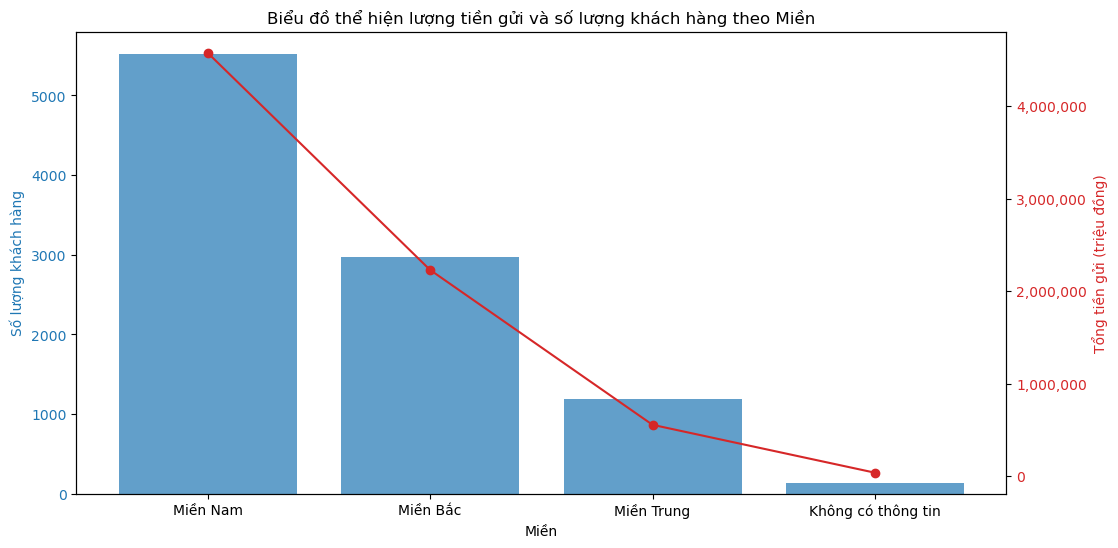

In [336]:
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ cột trên trục y1
color = 'tab:blue'
ax1.set_xlabel('Miền')
ax1.set_ylabel('Số lượng khách hàng', color=color)
ax1.bar(df_domain_customer['Miền'], df_domain_customer['total_customers'], color=color, alpha=0.7, label='Số lượng khách hàng')
ax1.tick_params(axis='y', labelcolor=color)

# Tạo một trục y2 mới cho biểu đồ line chart
ax2 = ax1.twinx()

# Vẽ biểu đồ line chart trên trục y2
color = 'tab:red'
ax2.set_ylabel('Tổng tiền gửi (triệu đồng)', color=color)
ax2.plot(df_domain_customer['Miền'], df_domain_customer['total_amount'], marker='o', color=color, label='Tổng tiền gửi (triệu đồng)')
ax2.tick_params(axis='y', labelcolor=color)

formatter = ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x * 1e-6))
ax2.yaxis.set_major_formatter(formatter)

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ thể hiện lượng tiền gửi và số lượng khách hàng theo Miền')

# Hiển thị biểu đồ
plt.show()

Ta có thể thấy khách hàng của doanh nghiệp tập trung ở Miền Nam (Chiếm tới 56% tổng số lượng khách hàng của ngân hàng)

So sánh với số lượng tiền gửi thì Miền Nam cũng có số lượng tiền gửi của khách hàng nhiều nhất tương ứng với tỷ lệ số lượng khách hàng ở Miền Nam.

Điều này cho thấy đối tượng khách hàng chính của ngân hàng vẫn là ở Miền Nam. Tuy nhiên thị trường Miền bắc và Miền Trung cũng có số lượng khách hàng lớn.

In [337]:
df_amount.head()

,customer_id,amount
0,999992,"619,716,667"
1,999994,"53,121,165"
2,1000017,0
3,1000018,"66,783"
4,1000021,"77,664,164"


In [338]:
df_customer.head()

,customer_id,segment,province_city,Miền,amount
0,1016846,Regular,HA NOI,Miền Bắc,"36,363"
1,1016868,Regular,HO CHI MINH,Miền Nam,"55,172"
2,1016903,Regular,HO CHI MINH,Miền Nam,"241,653"
3,1016936,Regular,HO CHI MINH,Miền Nam,"64,215"
4,1016938,Regular,HA NOI,Miền Bắc,"45,915"


In [339]:
df_product.head()

,customer_id,Tiền gửi có kỳ hạn,Thẻ tín dụng,Vay có tài sản thế chấp,Vay tín dụng cá nhân
0,1016846,0,0,0,0
1,1016868,0,0,0,0
2,1016903,0,0,0,1
3,1016936,0,0,0,0
4,1016938,0,1,0,1


In [340]:
df_product_unpivot.head()

,customer_id,Sản phẩm,Sử dụng dịch vụ
28,105425,Tiền gửi có kỳ hạn,1
29,105426,Tiền gửi có kỳ hạn,1
33,1557167,Tiền gửi có kỳ hạn,1
39,1032411,Tiền gửi có kỳ hạn,1
60,1032915,Tiền gửi có kỳ hạn,1


## 2.3. Xem xét các khách hàng đang vay tín chấp tại doanh nghiệp và làm mô hình dự đoán các khách hàng có khả năng sẽ vay tín chấp tại doanh nghiệp dựa vào các thông tin chúng ta đang có

In [349]:
df_amount

,customer_id,amount
0,999992,"619,716,667"
1,999994,"53,121,165"
2,1000017,0
3,1000018,"66,783"
4,1000021,"77,664,164"
...,...,...
113061,4693215,"41,849"
113062,4693217,525
113063,4693229,59
113064,4701973,0


In [350]:
df_customer

,customer_id,segment,province_city,Miền,amount
0,1016846,Regular,HA NOI,Miền Bắc,"36,363"
1,1016868,Regular,HO CHI MINH,Miền Nam,"55,172"
2,1016903,Regular,HO CHI MINH,Miền Nam,"241,653"
3,1016936,Regular,HO CHI MINH,Miền Nam,"64,215"
4,1016938,Regular,HA NOI,Miền Bắc,"45,915"
...,...,...,...,...,...
113061,126523,Gold,HO CHI MINH,Miền Nam,"898,108,015"
113062,1284395,Gold,VUNG TAU,Miền Nam,"81,221,937"
113063,1286275,Gold,NHA TRANG,Miền Trung,"119,988,241"
113064,1298809,Gold,HO CHI MINH,Miền Nam,"55,685,170,114"


In [351]:
df_product

,customer_id,Tiền gửi có kỳ hạn,Thẻ tín dụng,Vay có tài sản thế chấp,Vay tín dụng cá nhân
0,1016846,0,0,0,0
1,1016868,0,0,0,0
2,1016903,0,0,0,1
3,1016936,0,0,0,0
4,1016938,0,1,0,1
...,...,...,...,...,...
113061,126523,1,1,0,0
113062,1284395,0,1,1,0
113063,1286275,0,0,0,0
113064,1298809,1,0,0,0


In [352]:
# đầu tiên ta sẽ merge cả 3 Data trên với nhau
df_amount.merge(df_customer, on='customer_id')